In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1.tensorflow


In [42]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # v2를 비활성화하고 v1을 활성화 시킴
import pandas as pd
import numpy as np
tf.__version__

'2.10.0'

## Tensorflow
 - 데이터 흐름 그래프(tensor 객체의 흐름)
  - 그래프는 node(상수, 변수, 연산)와 edge로 구성
  - tf.Session()으로 실행
  - sess.run()을 통해 값을 확인

In [56]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [47]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [48]:
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [49]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [50]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([1])
sess = tf.Session()
sess.run(a)

array([0.57825273], dtype=float32)

In [51]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(w)

array([-0.82391304], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression 을 구현
## 2.1 독립변수 x가1개, 타겟변수 y 가 1개

In [52]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight오 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
#cost function(손실함수 = mse;최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:16.032211303710938, W:[-0.3326733], b:[0.27580562]
200번째 cost:0.0007353413966484368, W:[1.0314193], b:[0.9285767]
400번째 cost:0.00028079168987460434, W:[1.0194153], b:[0.9558646]
600번째 cost:0.00010721845319494605, W:[1.0119973], b:[0.97272724]
800번째 cost:4.0940853068605065e-05, W:[1.0074136], b:[0.98314714]
1000번째 cost:1.5633575458195992e-05, W:[1.0045812], b:[0.98958576]
1200번째 cost:5.970252004772192e-06, W:[1.0028311], b:[0.99356437]
1400번째 cost:2.279775344504742e-06, W:[1.0017495], b:[0.99602306]
1600번째 cost:8.710078986950975e-07, W:[1.0010815], b:[0.9975419]
1800번째 cost:3.329899982418283e-07, W:[1.0006685], b:[0.9984801]
2000번째 cost:1.2742768262796744e-07, W:[1.0004138], b:[0.99905974]
2200번째 cost:4.886799942482867e-08, W:[1.0002564], b:[0.99941784]
2400번째 cost:1.8781134869527705e-08, W:[1.000159], b:[0.9996392]
2600번째 cost:7.2552794883051774e-09, W:[1.000099], b:[0.99977577]
2800번째 cost:2.7853275241795927e-09, W:[1.0000614], b:[0.99986106]
3000번째 cost:1.0956947571472142e-0

## 2.2 predict를 위한 placeholder이용
 - placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [2]:
import numpy as np

# 데이터 타입을 float32로 수정
x = tf.placeholder(tf.float16)

H = 1 * x + 1
sess = tf.Session()

# 스칼라 값 5 전달
result1 = sess.run(H, feed_dict={x: 5})
print(result1)  # 출력: 6.0

# 벡터 값 전달 (배열로 x에 전달)
result2 = sess.run(H, feed_dict={x: np.array([1, 2, 3], dtype=np.float32)})
print(result2)  # 출력: [2. 3. 4.]


6.0
[2. 3. 4.]


In [6]:
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

w=tf.Variable(tf.random.normal([1]))
b=tf.Variable(tf.random.normal([1]))

H = w*x + b

cost = tf.reduce_mean(tf.square(H-y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, w, b],
                                        feed_dict={x:x_data,
                                                  y:y_data})
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))
    

0번째 cost:130.4217987060547, W:[0.52528757], b:[1.1653669]
200번째 cost:0.005411284975707531, W:[1.9749836], b:[1.1337125]
400번째 cost:0.0005322621436789632, W:[1.9921542], b:[1.0419357]
600번째 cost:5.2350522310007364e-05, W:[1.9975394], b:[1.0131519]
800번째 cost:5.1492233978933655e-06, W:[1.9992284], b:[1.0041244]
1000번째 cost:5.06557114476891e-07, W:[1.9997579], b:[1.0012938]
1200번째 cost:4.9861966999742435e-08, W:[1.9999241], b:[1.0004061]
1400번째 cost:4.942831033361017e-09, W:[1.999976], b:[1.0001277]
1600번째 cost:5.10772202311216e-10, W:[1.9999924], b:[1.0000407]
1800번째 cost:4.497451369656069e-11, W:[1.9999977], b:[1.000012]
2000번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2200번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2400번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2600번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2800번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
3000번째 cost:3.470859016863059e-11, W:[1.9999979], b:[1.00

In [ ]:
# 예측하기
sess.run(H, feed_dict)

## 스케일 조정

In [9]:
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,15,68,80,95])
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

w=tf.Variable(tf.random.normal([1]))
b=tf.Variable(tf.random.normal([1]))

H = w*x + b

cost = tf.reduce_mean(tf.square(H-y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    _, cost_val, W_val, b_val = sess.run([train, cost, w, b],
                                        feed_dict={x:x_data,
                                                  y:y_data})
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))
    

0번째 cost:3961.050048828125, W:[5.611336], b:[1.4476088]
200번째 cost:265.6222229003906, W:[13.118919], b:[2.4051538]
400번째 cost:265.61151123046875, W:[13.144263], b:[2.269689]
600번째 cost:265.61053466796875, W:[13.152212], b:[2.2272053]
800번째 cost:265.6103820800781, W:[13.154705], b:[2.2138815]
1000번째 cost:265.61041259765625, W:[13.155486], b:[2.2097023]
1200번째 cost:265.6103820800781, W:[13.155732], b:[2.2083905]
1400번째 cost:265.6103820800781, W:[13.1558075], b:[2.207982]
1600번째 cost:265.6103515625, W:[13.155831], b:[2.2078571]
1800번째 cost:265.6103515625, W:[13.155839], b:[2.2078176]
2000번째 cost:265.6103515625, W:[13.155839], b:[2.2078176]


In [ ]:
# cost 값이 멈춤 

## 2.4 scale이 다른 데이터의 linear regression을 구현
### sclae 을 맞추기 : 모든 데이터를 이정 범위내로 조정


normalization(정규화) : 0~1로 조정 X - Xmin normalization =/Xmax - Xmin * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)

standardization(표준화) : 평균0, 표준편차1로 조정 X - Xmean(평균) / Xstd(표준편차) * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용

In [13]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
scaled_x_data
scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())
scaled_y_data

array([0.        , 0.13043478, 0.70652174, 0.83695652, 1.        ])

In [36]:
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
#scaler_x.fit(x_data)
#scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler()
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    _, cost_val, W_val, b_val = sess.run([train, cost, w, b],
                                        feed_dict={x:scaled_x_data,
                                                  y:scaled_y_data})
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:1.6071674823760986, W:[0.75619775], b:[-1.0468972]
200번째 cost:0.013975812122225761, W:[1.1690234], b:[-0.02865713]
400번째 cost:0.01145548652857542, W:[1.1109978], b:[0.00992158]
600번째 cost:0.010489647276699543, W:[1.0725701], b:[0.03026957]
800번째 cost:0.010109670460224152, W:[1.0484538], b:[0.04300771]
1000번째 cost:0.009960180148482323, W:[1.0333273], b:[0.05099732]
1200번째 cost:0.009901371784508228, W:[1.0238395], b:[0.05600869]
1400번째 cost:0.009878229349851608, W:[1.0178884], b:[0.05915201]
1600번째 cost:0.009869123809039593, W:[1.0141555], b:[0.06112365]
1800번째 cost:0.009865546599030495, W:[1.0118142], b:[0.06236023]
2000번째 cost:0.009864136576652527, W:[1.0103456], b:[0.06313599]


In [37]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력 :', scaled_input, sep='\n')
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')
print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측을 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.1753966 ]
 [0.28765723]]
결과 :
[[19.136488]
 [29.464464]]


In [38]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

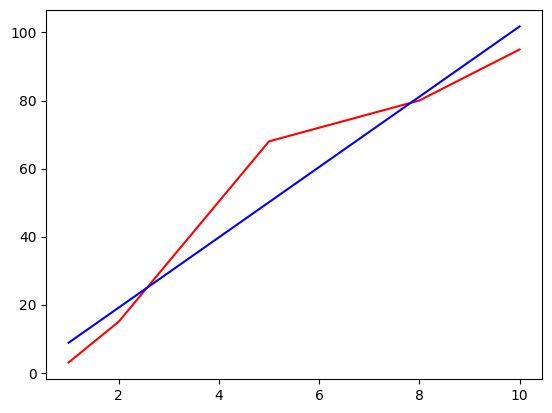

In [39]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [42]:
# 라이브러리르 쓰고 표준화
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,98]).reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 98]]
[[-1.22474487 -1.33836155]
 [-0.93313895 -1.01586479]
 [-0.05832118  0.4084959 ]
 [ 0.81649658  0.73099266]
 [ 1.39970842  1.2147378 ]]


## 변수가 3개/


In [54]:
import numpy as np
data = np.genfromtxt('data/ozone.csv',
                    delimiter=',',
                    skip_header=1,
                    missing_values='NA',
                    filling_values=np.nan)
display(data)


array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ],
       [ 28. ,   nan,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [  nan, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. ,   nan,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6

In [18]:
# 방법2 : csv파일 -> 데이터프레임 -> 결측치처리 -> 넘파이배열 -> 머신러닝
#1. csv를 데이터프레임으로 읽기
import pandas as pd
data = pd.read_csv('data/ozone.csv')
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [29]:
# 2. 결측치처리
# 결측치 처리 방법1 : 결측치가 있는 행을 제거
# data.dropna(how='any', axis=0, inplace=True)
# 결측치 처리 방법2 : 결측치 대체(열별 평균값으로 대체)
data.mean() # 열별평균
# data.fillna(value=data.mean(), inplace=True)
# 결측치 처리 방법3 : 결측치 대체(월별 열별 평균값으로 대체)
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
display(mean_data)
print('5월에 Ozone으로 대체할 값 :', mean_data.loc[5, 'Ozone'])

,Ozone,Solar.R
Month,,
5,23.615385,181.296296
6,29.444444,190.166667
7,59.115385,216.483871
8,59.961538,171.857143
9,31.448276,167.433333


5월에 Ozone으로 대체할 값 : 23.615384615384617


In [30]:
# 결측치가 있는 데이터
data[data['Ozone'].isna() | data['Solar.R'].isna()].head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5


In [31]:
def fill_nan(row):
    #print(row['Ozone'], row['Solar.R'])
   # print(row.isna())
    #두개의 행이 결측치이면 평균값으로 대체한다
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row['Month'], 'Solar.R']
    return row
fill_nan(data.loc[4])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12468\542713890.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
C:\Users\Admin\AppData\Local\Temp\ipykernel_12468\542713890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Solar.R'] = mean_data.loc[row['Month'], 'Solar.R']


Ozone       23.615385
Solar.R    181.296296
Wind        14.300000
Temp        56.000000
Month        5.000000
Day          5.000000
Name: 4, dtype: float64

In [39]:
data.apply(fill_nan, axis=1)
x_data = data[['Solar.R', 'Wind', 'Temp']].values
y_data = data[['Ozone']].values
x_data.shape, y_data.shape

((153, 3), (153, 1))

In [49]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # TensorFlow 2.x 기능 비활성화 (v1 스타일로 실행)


In [62]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# 입력값 (3개의 특성), 출력값 (1개 정답)
x = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 가중치와 편향 초기화
w = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))

# 가설 함수 H = xw + b
H = tf.matmul(x, w) + b

# 비용 함수 (MSE: 평균 제곱 오차)
cost = tf.reduce_mean(tf.square(H - y))

# 경사 하강법 최적화
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# 세션 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer()) 

# 학습 루프
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={x: x_train, y: y_train})
    if step%1000 == 0:
        print(step, cost_val)

1000 0.24277133
2000 0.025216231
3000 0.002619205
4000 0.00027207064
5000 2.828094e-05
6000 2.943171e-06
7000 3.0987454e-07
8000 3.155098e-08
9000 5.258395e-09
10000 2.217045e-09


In [63]:
# 예측하기
input_data = np.array([[190, 7.4, 67]])
sess.run(H, feed_dict={x:input_data})

array([[261.5838]], dtype=float32)

In [64]:
input_data = np.array([[118, 8, 72]])
sess.run(H, feed_dict={x:input_data})

array([[222.93272]], dtype=float32)

### 스케일 조정
- MinMaxScaler, StandardScaler

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(x_data)

In [68]:
# 예측하기
input_data = np.array([[118, 8, 72]])
scaled_y_hat = sess.run(H, feed_dict={x:scaler_x.transform(input_data)})
y_scaler.inverse_transform(scaled_y_hat)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# 3. 이진분류

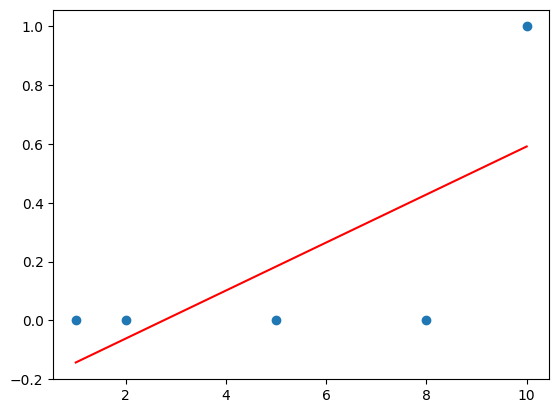

In [71]:
x = np.array([1,2,5,8,10])
y = np.array([0,0,0,0,1]) # 실제값
from scipy import stats
lm = stats.linregress(x, y) # 기울기와 y 절편
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x,y)

In [78]:
# 교안 50pt
import numpy as np
X_data = np.array([[10,0],
                   [8,1],
                   [3,3],
                   [2,3],
                   [5,1],
                   [2,0],
                   [1,0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0],])
# tensorflow 구현(tensor 그래프)
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개의 weight, bias
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
#cost 함수
# cost = tf.reduce_mean(tf.square(H-y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 8001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%800==0:
        print("{}번째 cost:{}".format(step, cost_val))

800번째 cost:0.2108505219221115
1600번째 cost:0.16581089794635773
2400번째 cost:0.13987232744693756
3200번째 cost:0.1212165504693985
4000번째 cost:0.10680949687957764
4800번째 cost:0.09529435634613037
5600번째 cost:0.08588570356369019
6400번째 cost:0.07806862890720367
7200번째 cost:0.0714840218424797
8000번째 cost:0.06587176024913788


In [83]:
# 모델 사용
input_data = np.array([[10,0]])
predict = tf.cast(H>=0.5, dtype=tf.float32)
sess.run(predict, feed_dict={X:input_data})

array([[1.]], dtype=float32)

In [85]:
# accuracy
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 1.0


## 4.xor

In [100]:
x_data = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
y_data = np.array([[0], [1], [1], [0]])
x = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2,4]))
b1 = tf.Variable(tf.random.normal([4]))

layer1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random.normal([4,1]))
b2 = tf.Variable(tf.random.normal([1]))
logits = tf.matmul(layer1, w2) + b2
H      = tf.sigmoid(logits)


cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1,10001):
    _,cost_val = sess.run([train, cost], feed_dict={x:x_data,
                                                   y:y_data})
    if step%1000==0:
        print(step, cost_val)

1000 0.5926912
2000 0.5296484
3000 0.48549306
4000 0.432927
5000 0.32968438
6000 0.18747431
7000 0.1027004
8000 0.071508706
9000 0.054470457
10000 0.043619707


In [103]:
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={x:x_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={x:x_data,
                                               y:y_data}))

모델 정확도 : 1.0


## x층 2개 -> 4개 ->1개
## layer x_data 2개 -> 10 ->20 ->10 ->1

In [115]:
x_data = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
y_data = np.array([[0], [1], [1], [0]])
x = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2,10]))
b1 = tf.Variable(tf.random.normal([10]))
layer1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = tf.Variable(tf.random.normal([10,20]))
b2 = tf.Variable(tf.random.normal([20]))
layer2 = tf.nn.relu(tf.matmul(layer1, w2)+b2)

w3 = tf.Variable(tf.random.normal([20,10]))
b3 = tf.Variable(tf.random.normal([10]))
layer3 = tf.nn.relu(tf.matmul(layer2, w3)+b3)

w4 = tf.Variable(tf.random.normal([10,1]))
b4 = tf.Variable(tf.random.normal([1]))

logits = tf.matmul(layer3, w4) + b4
H      = tf.sigmoid(logits)


cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1,301):
    _,cost_val = sess.run([train, cost], feed_dict={x:x_data,
                                                   y:y_data})
    if step%50==0:
        print(step, cost_val)

50 0.055699024
100 0.02987327
150 0.019671194
200 0.014361814
250 0.011197001
300 0.009165708


In [116]:
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={x:x_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={x:x_data,
                                               y:y_data}))

모델 정확도 : 1.0
